In [1]:
# Imports
import tensorflow as tf
import keras
import matplotlib.pyplot as plt
import numpy as np

Using TensorFlow backend.


In [2]:
from keras.applications.inception_v3 import InceptionV3, decode_predictions
from keras import backend as K

In [3]:
iv3 = InceptionV3()
print(iv3.summary())

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 299, 299, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 149, 149, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 149, 149, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 149, 149, 32) 0           batch_normalization[0][0]        
_______________________________________________________________________________________

In [8]:
from keras.preprocessing import image

x = image.img_to_array(image.load_img('./hacked_cat.png', target_size=(299, 299)))

# Cambio de rango 0-255 -> -1-1
x /= 255
x -= 0.5
x *= 2

x = x.reshape([1, x.shape[0], x.shape[1], x.shape[2]])

y = iv3.predict(x)
decode_predictions(y)

[[('n07749582', 'lemon', 0.999574),
  ('n07747607', 'orange', 0.00012925583),
  ('n04409515', 'tennis_ball', 4.5291607e-05),
  ('n07742313', 'Granny_Smith', 3.3054937e-05),
  ('n07932039', 'eggnog', 3.1860185e-05)]]

## Ataques Adversarios

In [5]:
inp_layer = iv3.layers[0].input
out_layer = iv3.layers[-1].output

target_class = 951
loss = out_layer[0, target_class]
grad = K.gradients(loss, inp_layer)[0]

optimize_gradient = K.function([inp_layer, K.learning_phase()], [grad, loss])
adv = np.copy(x)
pert = 0.01
max_pert = x + pert
min_pert = x - pert

cost=0.0
while cost < 0.95:
    gr, cost = optimize_gradient([adv, 0])
    adv += gr
    adv = np.clip(adv, min_pert, max_pert)
    adv = np.clip(adv, -1, 1)
    print('Target cost: ', cost)
    
hacked_img = np.copy(adv)

Target cost:  4.340677e-05
Target cost:  4.361316e-05
Target cost:  4.381947e-05
Target cost:  4.402982e-05
Target cost:  4.423985e-05
Target cost:  4.4451383e-05
Target cost:  4.4662855e-05
Target cost:  4.4878154e-05
Target cost:  4.5097353e-05
Target cost:  4.5318615e-05
Target cost:  4.5541365e-05
Target cost:  4.5763045e-05
Target cost:  4.598544e-05
Target cost:  4.620508e-05
Target cost:  4.6426725e-05
Target cost:  4.66504e-05
Target cost:  4.6876245e-05
Target cost:  4.7104448e-05
Target cost:  4.7336165e-05
Target cost:  4.7568577e-05
Target cost:  4.7801404e-05
Target cost:  4.8036527e-05
Target cost:  4.826886e-05
Target cost:  4.8504142e-05
Target cost:  4.8743736e-05
Target cost:  4.898545e-05
Target cost:  4.9229337e-05
Target cost:  4.947299e-05
Target cost:  4.9716633e-05
Target cost:  4.9957645e-05
Target cost:  5.0198658e-05
Target cost:  5.0439343e-05
Target cost:  5.0676717e-05
Target cost:  5.0915245e-05
Target cost:  5.1156567e-05
Target cost:  5.14003e-05
Target

Target cost:  0.00020029671
Target cost:  0.00020160974
Target cost:  0.00020294003
Target cost:  0.00020429207
Target cost:  0.00020566498
Target cost:  0.00020705444
Target cost:  0.00020845905
Target cost:  0.00020988953
Target cost:  0.00021132993
Target cost:  0.0002127732
Target cost:  0.0002142582
Target cost:  0.00021574511
Target cost:  0.00021724358
Target cost:  0.00021876516
Target cost:  0.00022029455
Target cost:  0.00022182504
Target cost:  0.00022337514
Target cost:  0.00022492257
Target cost:  0.00022646318
Target cost:  0.0002280268
Target cost:  0.00022960354
Target cost:  0.0002312601
Target cost:  0.00023290454
Target cost:  0.00023458306
Target cost:  0.00023628164
Target cost:  0.0002380289
Target cost:  0.00023979649
Target cost:  0.00024158492
Target cost:  0.00024337297
Target cost:  0.00024516525
Target cost:  0.0002469289
Target cost:  0.00024870565
Target cost:  0.00025047676
Target cost:  0.00025231496
Target cost:  0.00025416422
Target cost:  0.0002560702

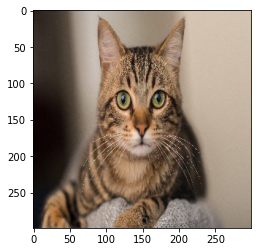

In [6]:
adv /= 2
adv += 0.5
adv *= 255

plt.imshow(adv[0].astype(np.uint8))
plt.show()

In [7]:
from PIL import Image
im = Image.fromarray(adv[0].astype(np.uint8))
im.save('./hacked_cat.png')